In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.utils import shuffle
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
data = pd.DataFrame(data = np.c_[data['data'], data['target']],
                   columns = data['feature_names'] + ['target'])

In [4]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Exploratory Analysis

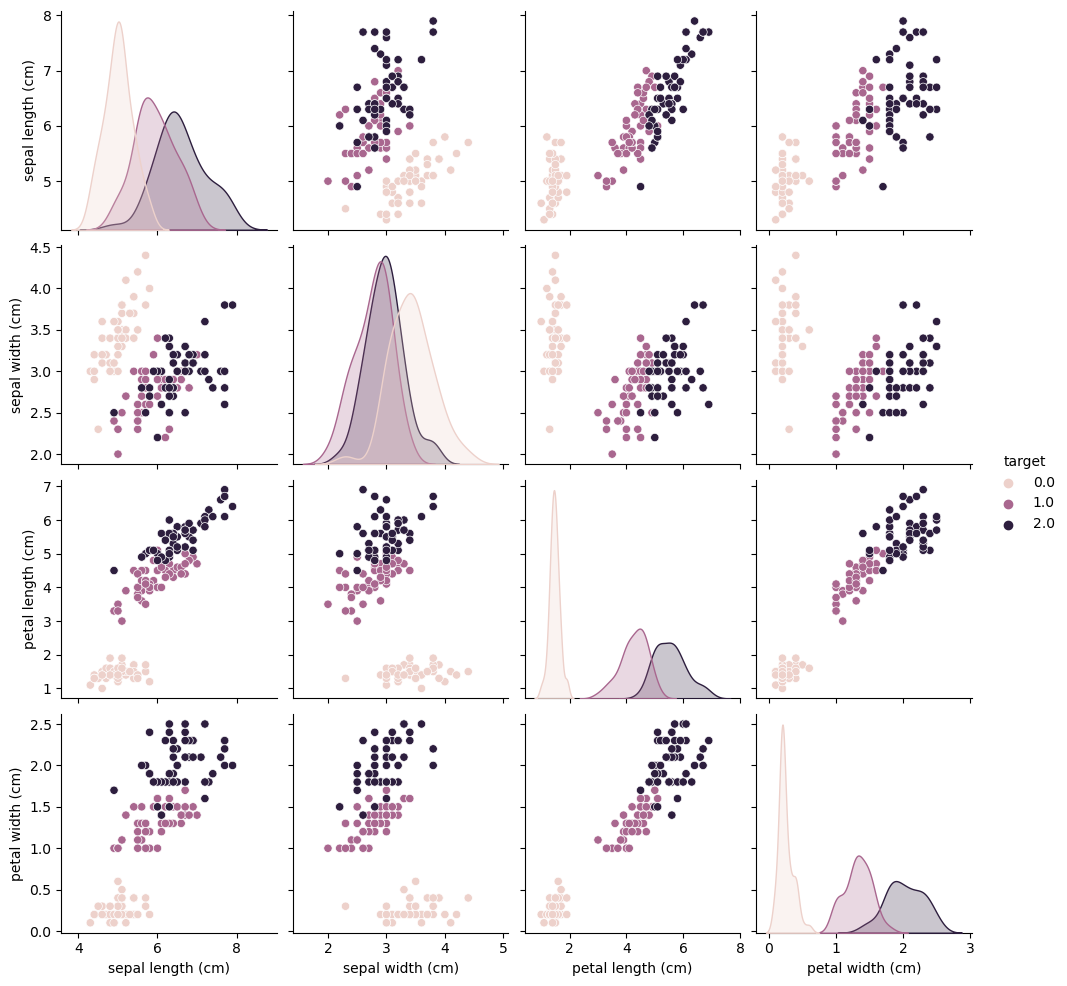

In [5]:
sns.pairplot(data = data[data.columns[0:6]], hue = 'target')
plt.show()

# HeatMap

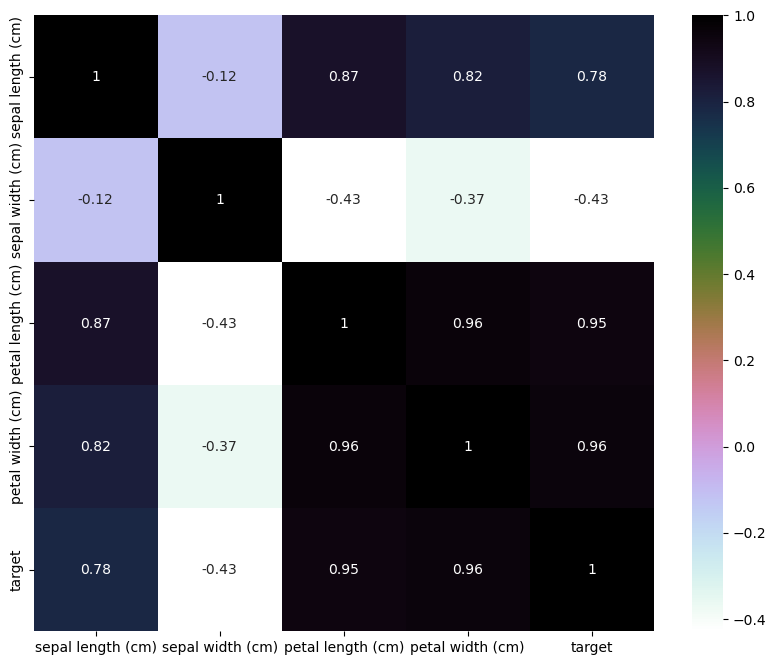

In [6]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot=True, cmap = 'cubehelix_r')
plt.show()

In [7]:
# from heatmap we can say that petal lenght highly correlated with petal width

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# shuffling data
data = shuffle(data)

In [10]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
42,4.4,3.2,1.3,0.2,0.0
116,6.5,3.0,5.5,1.8,2.0
30,4.8,3.1,1.6,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
64,5.6,2.9,3.6,1.3,1.0
...,...,...,...,...,...
74,6.4,2.9,4.3,1.3,1.0
47,4.6,3.2,1.4,0.2,0.0
85,6.0,3.4,4.5,1.6,1.0
136,6.3,3.4,5.6,2.4,2.0


In [11]:
# splitting features and target dataset
X = data.drop('target',axis =1)
target = data[['target']]
y_true = target.copy()

In [12]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
42,4.4,3.2,1.3,0.2
116,6.5,3.0,5.5,1.8
30,4.8,3.1,1.6,0.2
2,4.7,3.2,1.3,0.2
64,5.6,2.9,3.6,1.3
...,...,...,...,...
74,6.4,2.9,4.3,1.3
47,4.6,3.2,1.4,0.2
85,6.0,3.4,4.5,1.6
136,6.3,3.4,5.6,2.4


In [13]:
target

,target
42,0.0
116,2.0
30,0.0
2,0.0
64,1.0
...,...
74,1.0
47,0.0
85,1.0
136,2.0


In [14]:
# applying standard scaler on feature dataset
X = StandardScaler().fit_transform(X)

# applying label binarizer on target dataset
target = LabelBinarizer().fit_transform(target)

In [15]:
target

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [16]:
X

array([[-1.74885626e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [ 7.95669016e-01, -1.31979479e-01,  9.90107977e-01,
         7.90670654e-01],
       [-1.26418478e+00,  9.82172869e-02, -1.22655167e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-2.94841818e-01, -3.62176246e-01, -8.98031345e-02,
         1.32509732e-01],
       [-7.79513300e-01, -8.22569778e-01,  8.07091462e-02,
         2.64141916e-01],
       [-6.58345429e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [ 1.89829664e-01, -3.62176246e-01,  4.21733708e-01,
         3.95774101e-01],
       [ 6.86617933e-02,  3.28414053e-01,  5.92245988e-01,
         7.90670654e-01],
       [ 5.53333275e-01, -3.62176246e-01,  1.04694540e+00,
         7.90670654e-01],
       [-4.16009689e-01, -1.51316008e+00,  2.38717193e-02,
        -1.30754636e-01],
       [ 1.15917263e+00, -1.31979479e-01,  9.90107977e-01,
      

In [17]:
# importing and applying train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 101)

In [18]:
model = Sequential()
model.add(Dense (12, input_dim = 4, activation = 'relu'))
model.add(Dense (units = 8, activation = 'relu'))
model.add(Dense (units = 10, activation = 'relu'))
model.add(Dense (units = 3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 120, validation_data = (x_test, y_test))

Epoch 1/120
4/4 [==============================] - 2s 169ms/step - loss: 1.0844 - accuracy: 0.3583 - val_loss: 1.0781 - val_accuracy: 0.4000
Epoch 2/120
4/4 [==============================] - 0s 24ms/step - loss: 1.0740 - accuracy: 0.5083 - val_loss: 1.0686 - val_accuracy: 0.5667
Epoch 3/120
4/4 [==============================] - 0s 21ms/step - loss: 1.0646 - accuracy: 0.5833 - val_loss: 1.0590 - val_accuracy: 0.6333
Epoch 4/120
4/4 [==============================] - 0s 21ms/step - loss: 1.0554 - accuracy: 0.6250 - val_loss: 1.0497 - val_accuracy: 0.6667
Epoch 5/120
4/4 [==============================] - 0s 21ms/step - loss: 1.0469 - accuracy: 0.6500 - val_loss: 1.0393 - val_accuracy: 0.7000
Epoch 6/120
4/4 [==============================] - 0s 24ms/step - loss: 1.0375 - accuracy: 0.6917 - val_loss: 1.0285 - val_accuracy: 0.7333
Epoch 7/120
4/4 [==============================] - 0s 24ms/step - loss: 1.0280 - accuracy: 0.6917 - val_loss: 1.0169 - val_accuracy: 0.7333
Epoch 8/120
4/4 [==

4/4 [==============================] - 0s 21ms/step - loss: 0.1325 - accuracy: 0.9667 - val_loss: 0.1531 - val_accuracy: 0.9333
Epoch 60/120
4/4 [==============================] - 0s 21ms/step - loss: 0.1275 - accuracy: 0.9750 - val_loss: 0.1494 - val_accuracy: 0.9333
Epoch 61/120
4/4 [==============================] - 0s 21ms/step - loss: 0.1220 - accuracy: 0.9750 - val_loss: 0.1463 - val_accuracy: 0.9333
Epoch 62/120
4/4 [==============================] - 0s 24ms/step - loss: 0.1179 - accuracy: 0.9750 - val_loss: 0.1436 - val_accuracy: 0.9333
Epoch 63/120
4/4 [==============================] - 0s 24ms/step - loss: 0.1126 - accuracy: 0.9750 - val_loss: 0.1407 - val_accuracy: 0.9333
Epoch 64/120
4/4 [==============================] - 0s 21ms/step - loss: 0.1089 - accuracy: 0.9750 - val_loss: 0.1383 - val_accuracy: 0.9333
Epoch 65/120
4/4 [==============================] - 0s 21ms/step - loss: 0.1040 - accuracy: 0.9750 - val_loss: 0.1361 - val_accuracy: 0.9333
Epoch 66/120
4/4 [========

4/4 [==============================] - 0s 24ms/step - loss: 0.0365 - accuracy: 0.9833 - val_loss: 0.1650 - val_accuracy: 0.9333
Epoch 118/120
4/4 [==============================] - 0s 21ms/step - loss: 0.0360 - accuracy: 0.9833 - val_loss: 0.1656 - val_accuracy: 0.9333
Epoch 119/120
4/4 [==============================] - 0s 21ms/step - loss: 0.0358 - accuracy: 0.9833 - val_loss: 0.1662 - val_accuracy: 0.9333
Epoch 120/120
4/4 [==============================] - 0s 21ms/step - loss: 0.0351 - accuracy: 0.9833 - val_loss: 0.1687 - val_accuracy: 0.9333


In [19]:
# predicting test data
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 208ms/step


In [20]:
y_pred

array([[7.3361612e-04, 2.4195437e-01, 7.5731200e-01],
       [1.2403367e-05, 8.0992570e-05, 9.9990648e-01],
       [2.5789326e-03, 9.8738104e-01, 1.0040022e-02],
       [2.1764610e-05, 6.2666804e-05, 9.9991554e-01],
       [2.7407537e-04, 3.4478623e-02, 9.6524733e-01],
       [1.5549153e-05, 3.2939377e-05, 9.9995142e-01],
       [7.4612871e-03, 9.4760531e-01, 4.4933327e-02],
       [3.2838163e-04, 9.9768674e-01, 1.9848295e-03],
       [9.9804813e-01, 1.1951219e-03, 7.5664342e-04],
       [4.9511733e-04, 1.2754293e-02, 9.8675054e-01],
       [1.2634532e-02, 9.7139776e-01, 1.5967570e-02],
       [4.7727744e-06, 6.5902459e-05, 9.9992925e-01],
       [8.4540097e-06, 1.0166212e-04, 9.9988979e-01],
       [9.9612671e-01, 2.3917188e-03, 1.4814703e-03],
       [1.8908070e-04, 1.0156764e-03, 9.9879527e-01],
       [1.0941074e-01, 8.8154852e-01, 9.0407236e-03],
       [9.9747998e-01, 1.5203820e-03, 9.9967734e-04],
       [9.9729568e-01, 1.7480737e-03, 9.5622073e-04],
       [7.8379369e-04, 1.282

In [21]:
y_pred = np.argmax(y_pred, axis =1)

In [22]:
y_pred

array([2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 0, 1, 0], dtype=int64)

In [23]:
y_test 

array([[0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [24]:
y_test = np.argmax(y_test, axis =1)

In [25]:
y_test

array([2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 0], dtype=int64)

[Text(0, 0.5, 'setosa'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'virginica')]

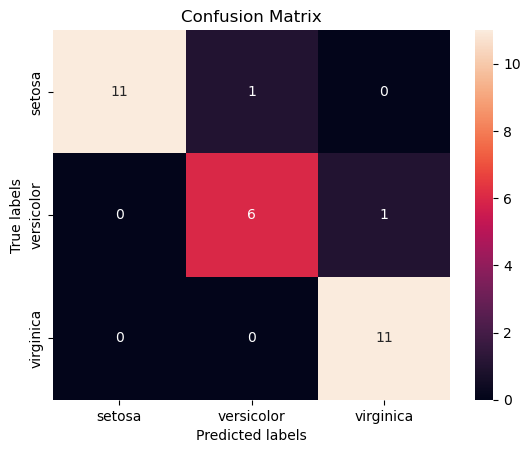

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.tolist(), y_pred.tolist())

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])
ax.yaxis.set_ticklabels(['setosa', 'versicolor', 'virginica'])

In [27]:
from sklearn.metrics import precision_recall_fscore_support

In [28]:
precision_recall_fscore_support(y_test.tolist(), y_pred.tolist(), average = 'macro')

(0.9246031746031745, 0.9246031746031745, 0.9233954451345756, None)

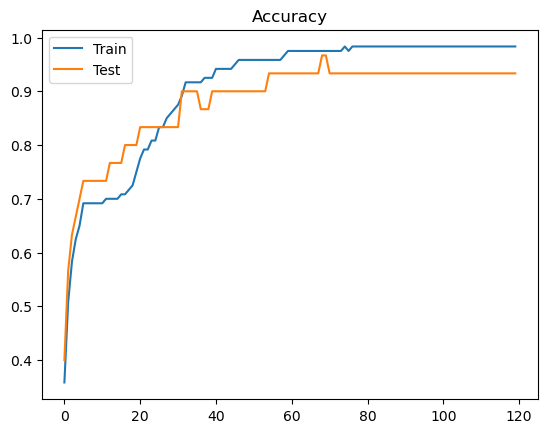

In [30]:
# plotting accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

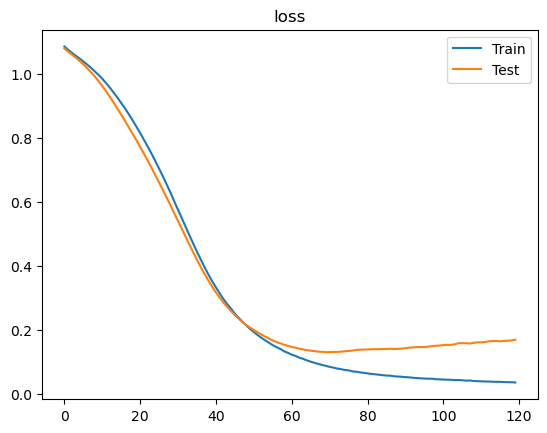

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['Train', 'Test'])
plt.show()